## VISUALIZATION (SCATTER PLOT)

In [5]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, pairwise_distances


def plot_multiple_raw_scatter(filepaths, titles, ncols=2):
    """
    Plots multiple 2-feature datasets in a compact subplot layout.
    """
    n = len(filepaths)
    nrows = (n + ncols - 1) // ncols

    plt.figure(figsize=(10, 6))

    for i, (path, title) in enumerate(zip(filepaths, titles)):
        # Load dataset
        data = pd.read_csv(path)
        X = data.iloc[:, :2]

        # Subplot
        plt.subplot(nrows, ncols, i + 1)
        plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=20, c="blue")
        plt.xlabel(X.columns[0], fontsize=9)
        plt.ylabel(X.columns[1], fontsize=9)
        plt.title(title, fontsize=10)
        plt.grid(True)

    plt.tight_layout()
    plt.show()



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/popos/.local/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/popos/.local/lib/python3.10/site-packages/traitlets/config/application.py", line 1046, in launch_instance
    app.start()
  File "/home/popos/.local/lib/python3.10/site-packag

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

In [ ]:
import os
os.listdir("Dataset2")

plot_multiple_raw_scatter(
    [
        "Dataset2/Compact.csv",
        "Dataset2/Skewed.csv",
        "Dataset2/Subclusters.csv",
        "Dataset2/wellSeperated.csv"   # <-- fix spelling based on your folder
    ],
    [
        "Dataset 1: Compact",
        "Dataset 2: Skewed",
        "Dataset 3: Subclusters",
        "Dataset 4: Well Separated"
    ]
)



NameError: name 'pd' is not defined

<Figure size 1000x600 with 0 Axes>

## Elbow, Silhoutte score, and Intra cluster score for each graph

In [ ]:
# ------------------------------------------
# Dataset file paths (update if needed)
# ------------------------------------------
datasets = {
    "Dataset 1: Compact": "Dataset2/Compact.csv",
    "Dataset 2: Skewed": "Dataset2/Skewed.csv",
    "Dataset 3: Subclusters": "Dataset2/Subclusters.csv",
    "Dataset 4: Well Separated": "Dataset2/wellSeperated.csv"
}


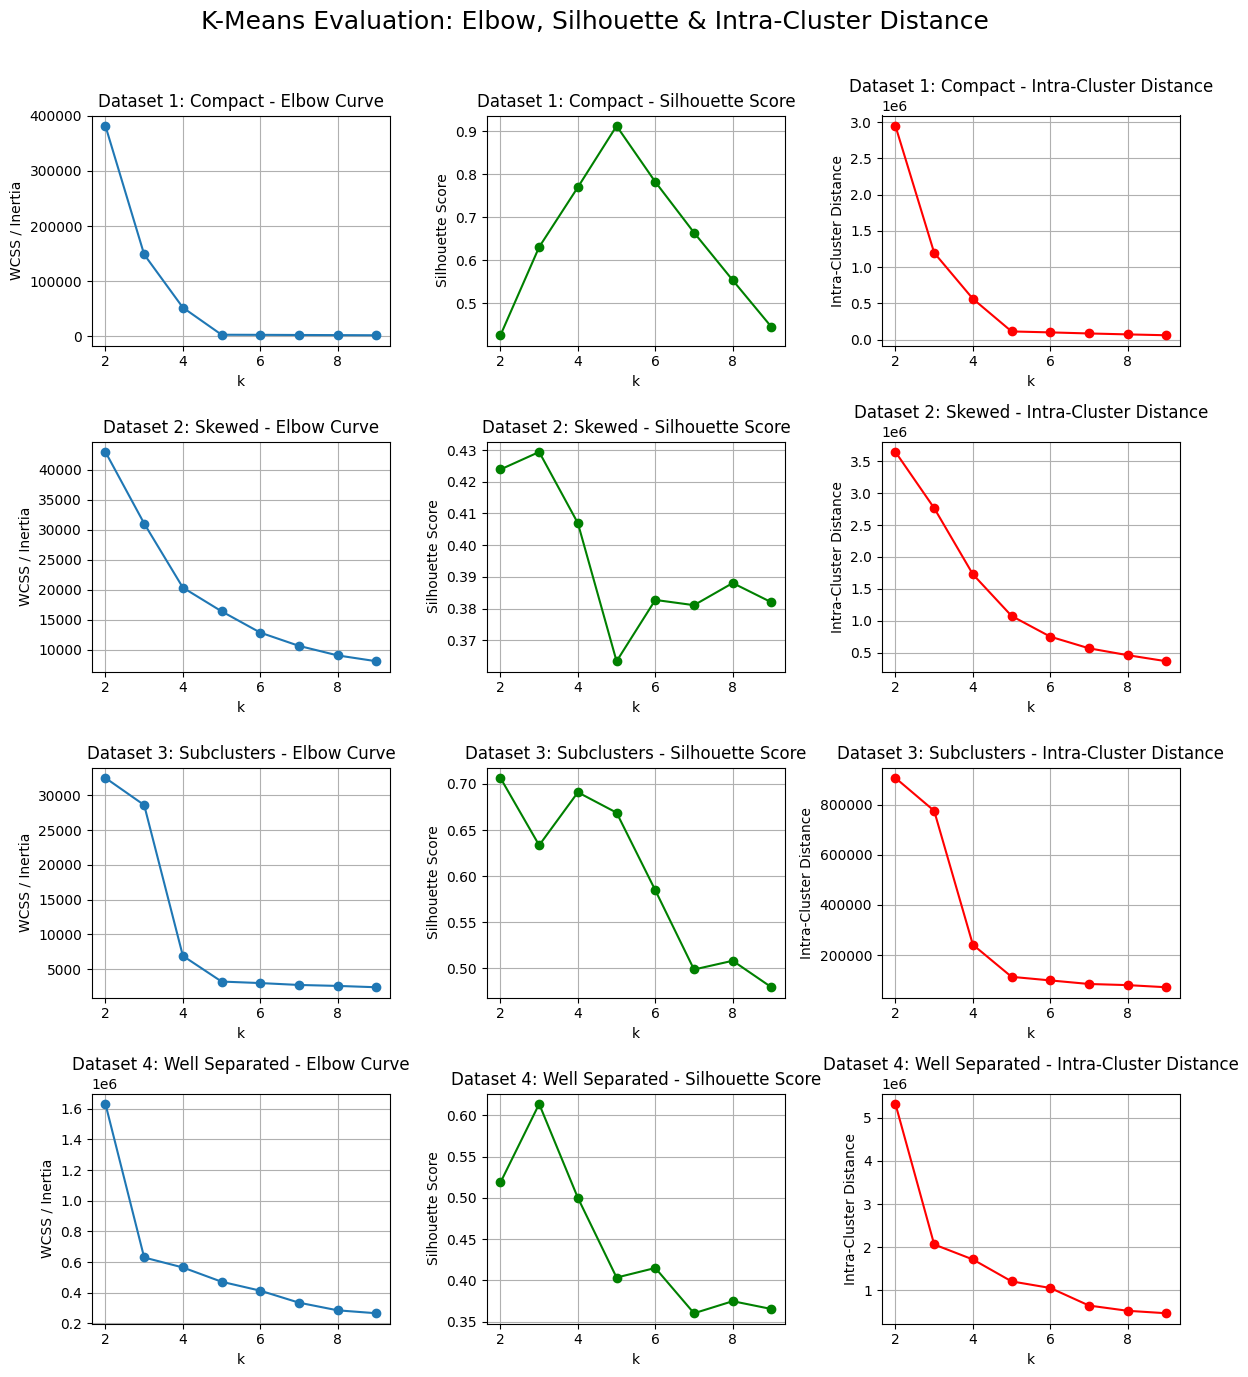

In [ ]:

# --------------------------------------------------
# Range of K values to test
# --------------------------------------------------
K_RANGE = range(2, 10)

def intra_cluster_distance(X, labels):
    total = 0
    for c in np.unique(labels):
        pts = X[labels == c]
        if len(pts) > 1:
            total += np.sum(pairwise_distances(pts))
    return total


# --------------------------------------------------
# 12-plot figure (4 datasets × 3 metrics)
# --------------------------------------------------
fig, axes = plt.subplots(4, 3, figsize=(12,14))
fig.suptitle("K-Means Evaluation: Elbow, Silhouette & Intra-Cluster Distance", fontsize=18)

row = 0

for name, filepath in datasets.items():

    # Load dataset
    X = pd.read_csv(filepath).values

    # Metrics per dataset
    inertias = []
    silhouettes = []
    intra_dists = []

    for k in K_RANGE:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X)

        # Elbow
        inertias.append(kmeans.inertia_)

        # Silhouette Score
        sil = silhouette_score(X, labels)
        silhouettes.append(sil)

        # Intra-cluster distance
        icd = intra_cluster_distance(X, labels)
        intra_dists.append(icd)

    # ====================================================
    # Plot 1 — ELBOW CURVE
    # ====================================================
    ax1 = axes[row, 0]
    ax1.plot(list(K_RANGE), inertias, marker='o')
    ax1.set_title(f"{name} - Elbow Curve")
    ax1.set_xlabel("k")
    ax1.set_ylabel("WCSS / Inertia")
    ax1.grid(True)

    # ====================================================
    # Plot 2 — SILHOUETTE CURVE
    # ====================================================
    ax2 = axes[row, 1]
    ax2.plot(list(K_RANGE), silhouettes, marker='o', color="green")
    ax2.set_title(f"{name} - Silhouette Score")
    ax2.set_xlabel("k")
    ax2.set_ylabel("Silhouette Score")
    ax2.grid(True)

    # ====================================================
    # Plot 3 — INTRA-CLUSTER DISTANCE
    # ====================================================
    ax3 = axes[row, 2]
    ax3.plot(list(K_RANGE), intra_dists, marker='o', color="red")
    ax3.set_title(f"{name} - Intra-Cluster Distance")
    ax3.set_xlabel("k")
    ax3.set_ylabel("Intra-Cluster Distance")
    ax3.grid(True)

    row += 1

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

## k-Means

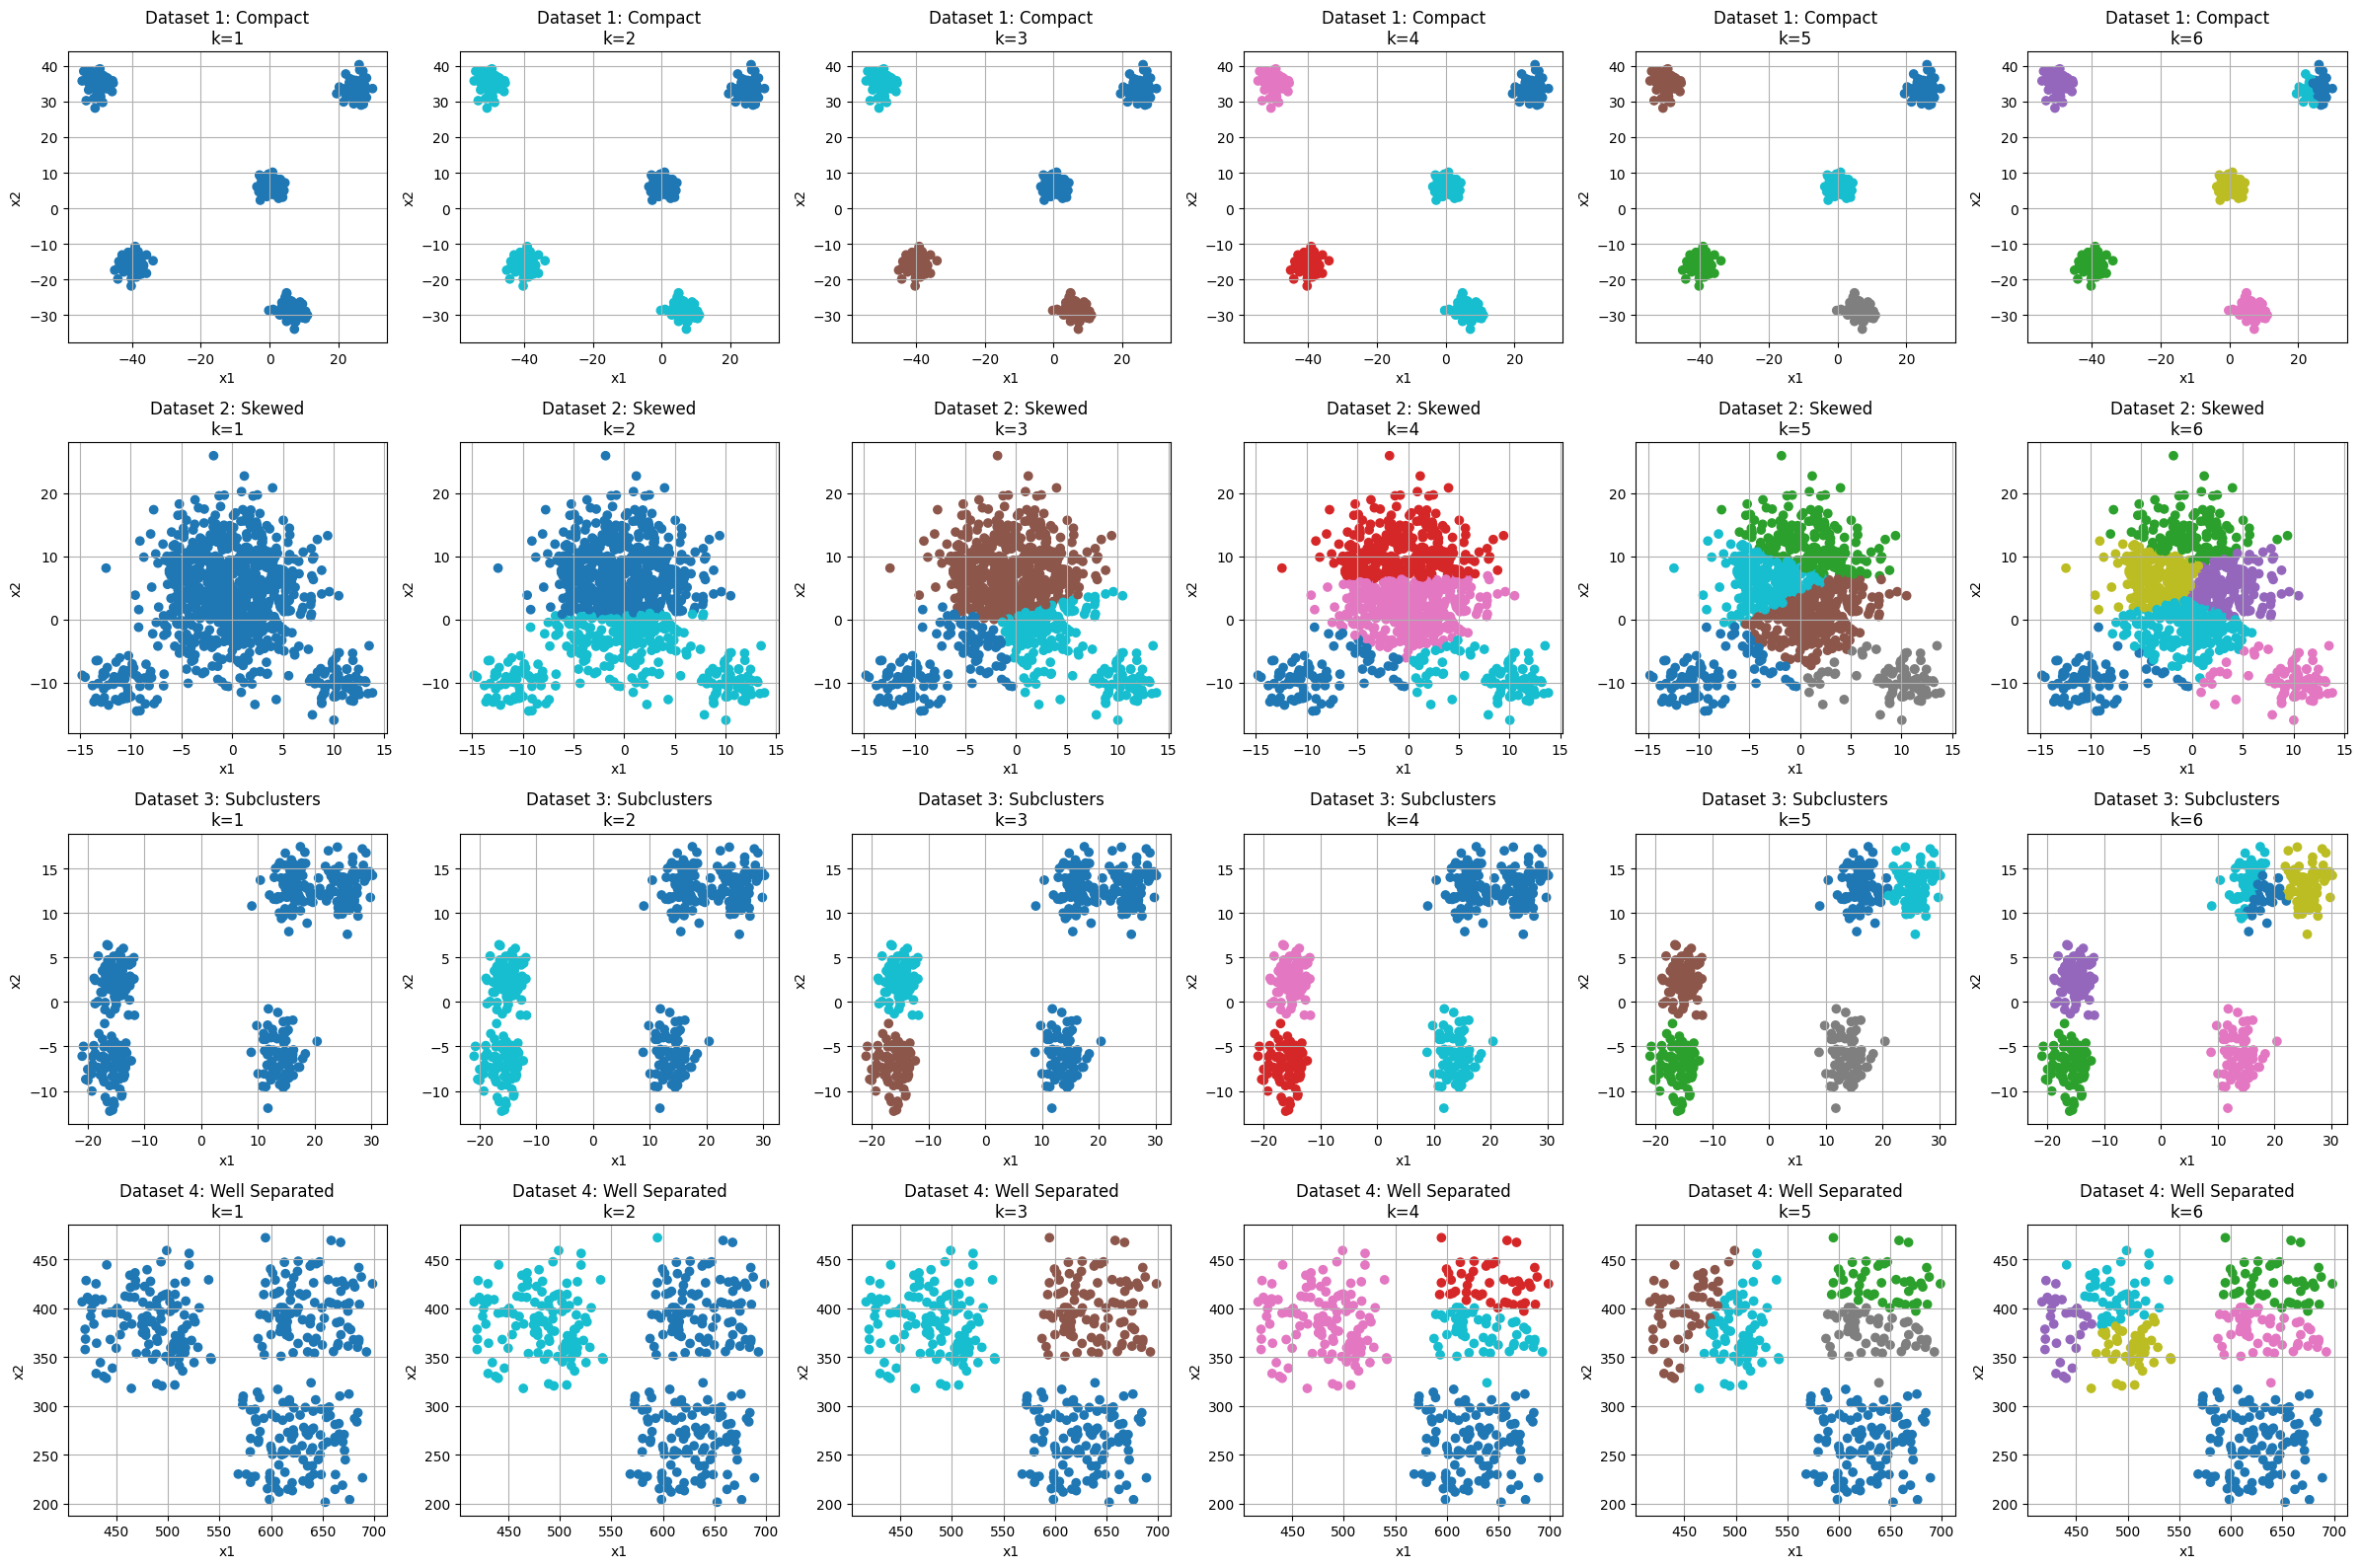

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

plt.figure(figsize=(24, 16))  # large figure to accommodate all subplots

k_range = range(1, 7)
plot_index = 1

for name, filepath in datasets.items():
    # Load dataset
    df = pd.read_csv(filepath)
    X = df.values

    for k in k_range:
        # K-Means clustering
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X)

        # Plot clusters
        plt.subplot(len(datasets), len(k_range), plot_index)
        plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10')
        plt.title(f"{name}\nk={k}")
        plt.xlabel("x1")
        plt.ylabel("x2")
        plt.grid(True)

        plot_index += 1

plt.tight_layout()
plt.show()


## Agglomerative 

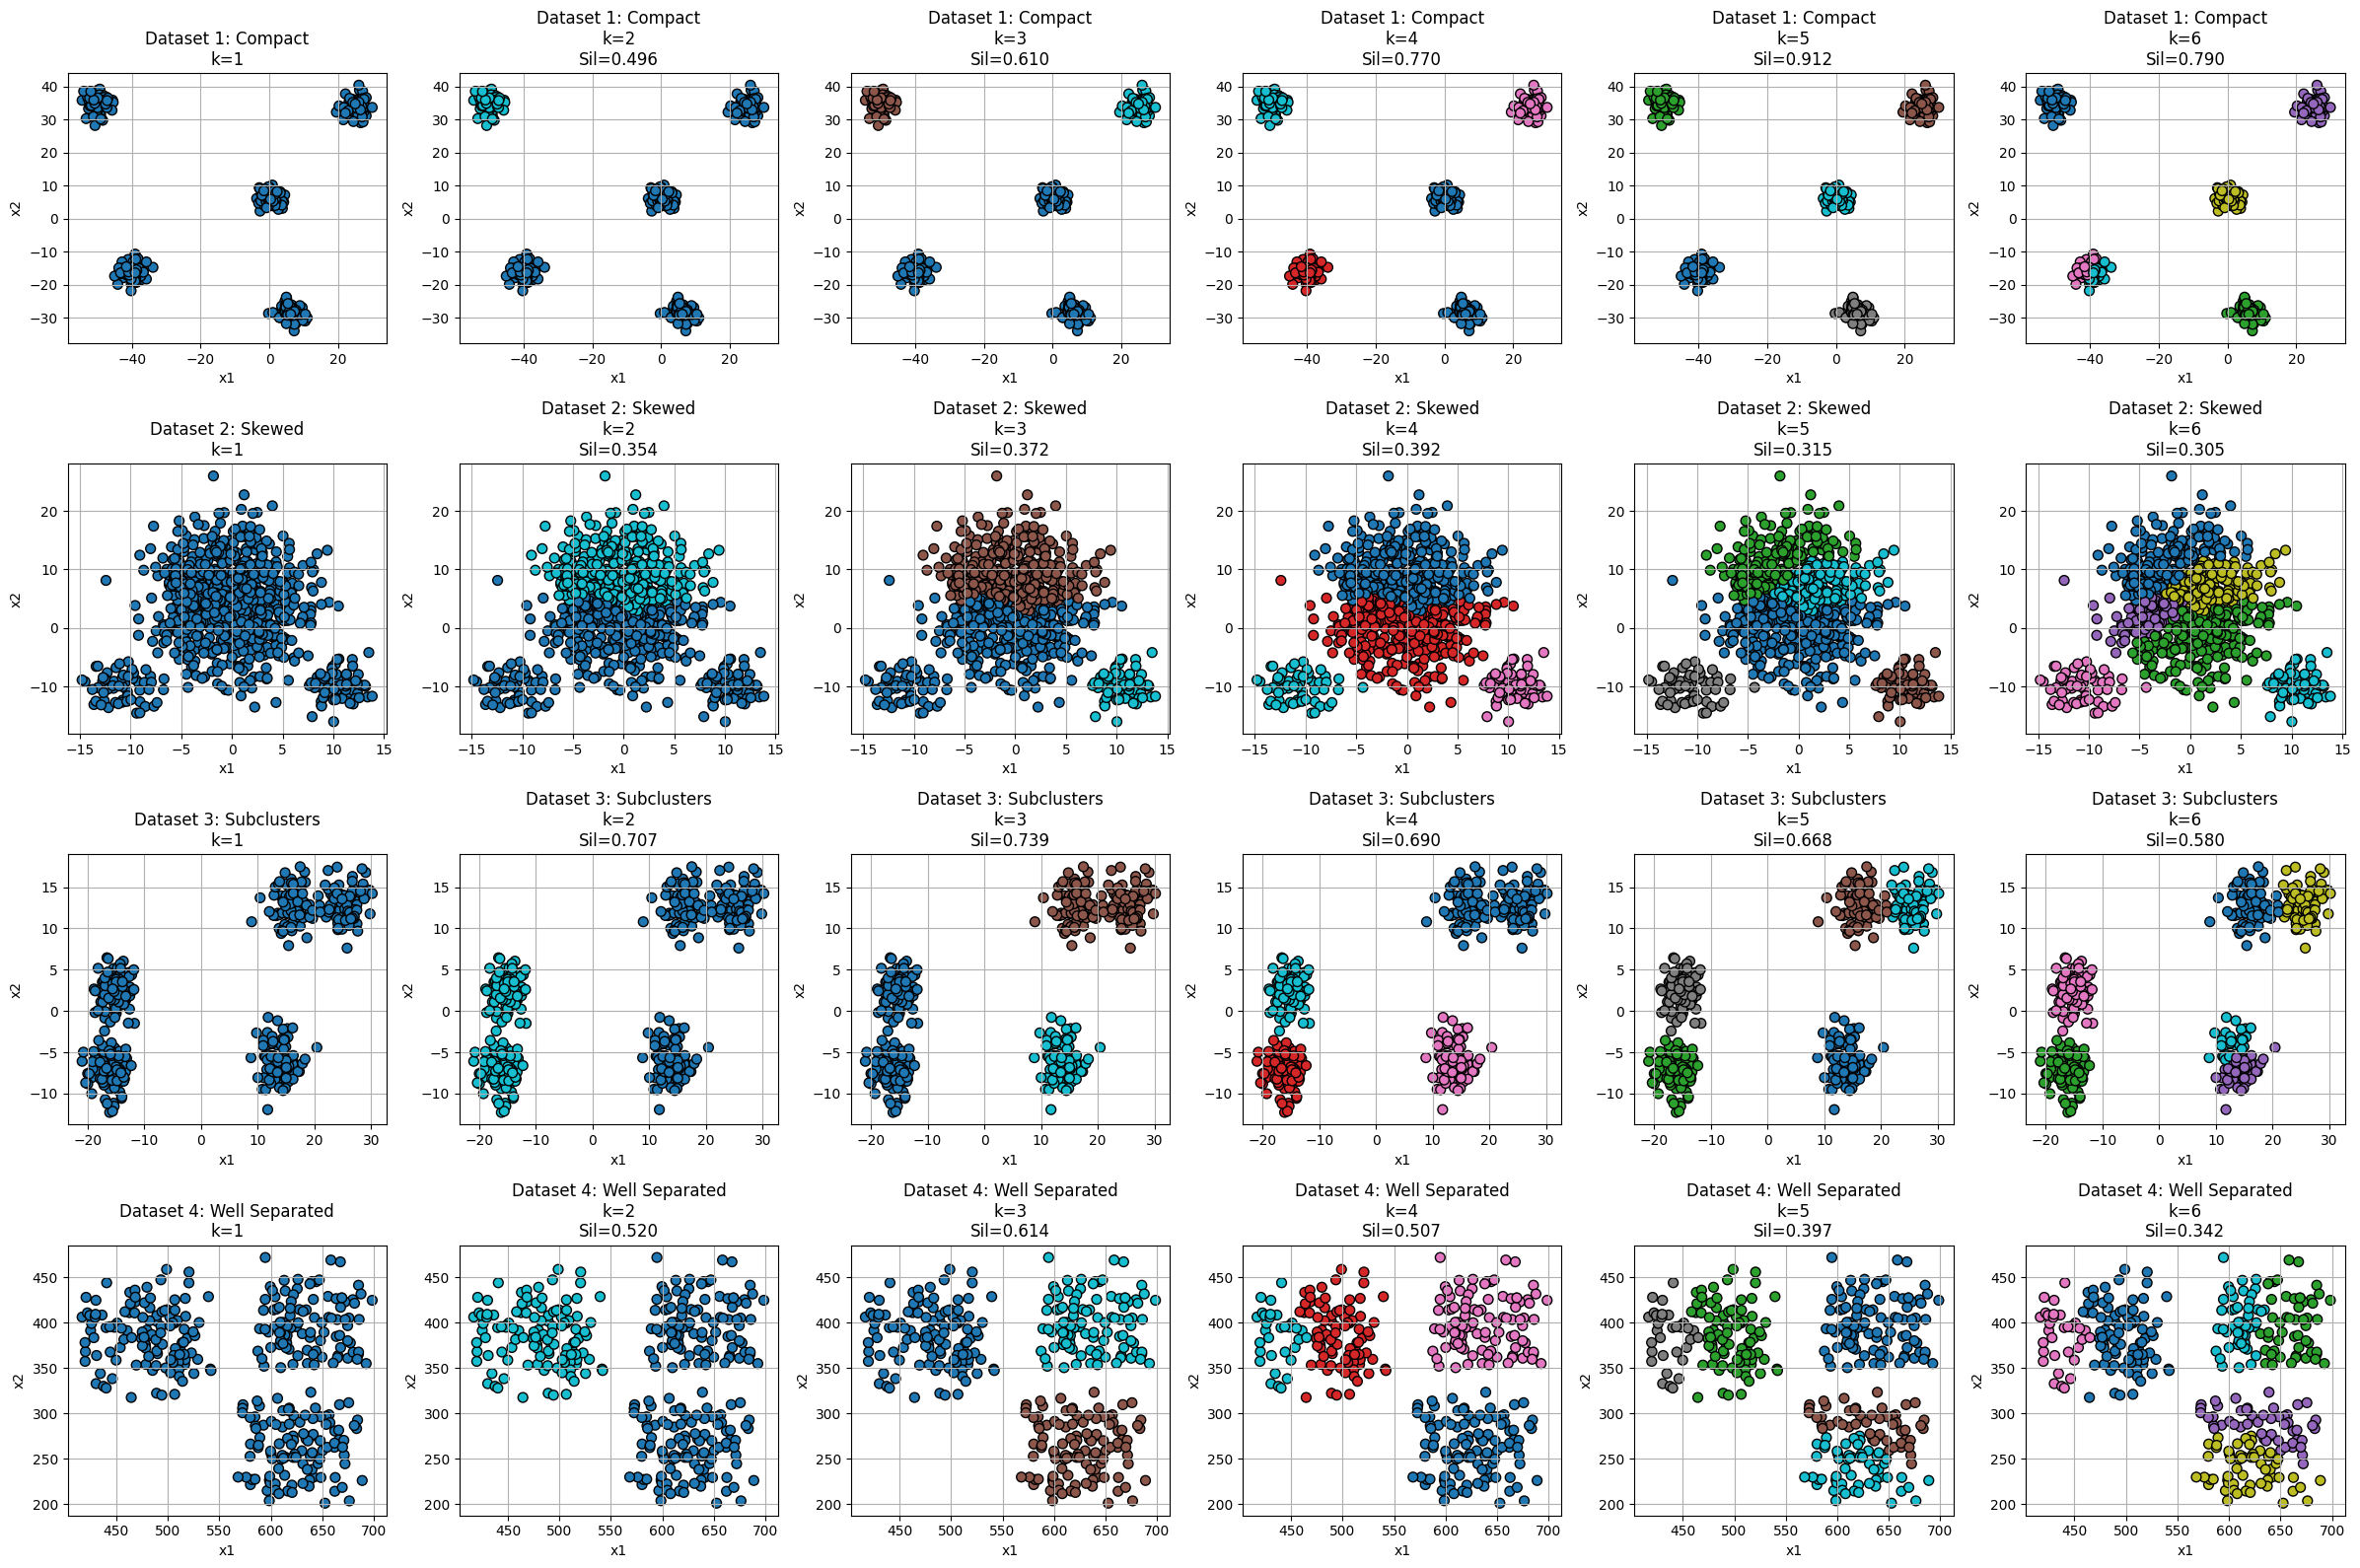

Agglomerative Silhouette Scores:
Dataset 1: Compact: ['NA', '0.496', '0.610', '0.770', '0.912', '0.790']
Dataset 2: Skewed: ['NA', '0.354', '0.372', '0.392', '0.315', '0.305']
Dataset 3: Subclusters: ['NA', '0.707', '0.739', '0.690', '0.668', '0.580']
Dataset 4: Well Separated: ['NA', '0.520', '0.614', '0.507', '0.397', '0.342']


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

agglo_sil_scores = {}  # to store silhouette scores for all k

plt.figure(figsize=(24, 16))  # large figure for all subplots
plot_index = 1
k_range = range(1, 7)  # k = 1 to 6

for name, filepath in datasets.items():
    df = pd.read_csv(filepath)
    X = df.values
    
    agglo_sil_scores[name] = []
    
    for k in k_range:
        # Agglomerative Clustering
        agglom = AgglomerativeClustering(n_clusters=k, linkage='ward')
        labels = agglom.fit_predict(X)
        
        # Compute silhouette score only if k > 1
        sil = silhouette_score(X, labels) if k > 1 else None
        agglo_sil_scores[name].append(sil)
        
        # Plot
        plt.subplot(len(datasets), len(k_range), plot_index)
        plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', s=50, edgecolor='k')
        title = f"{name}\nk={k}"
        if sil is not None:
            title += f"\nSil={sil:.3f}"
        plt.title(title)
        plt.xlabel("x1")
        plt.ylabel("x2")
        plt.grid(True)
        
        plot_index += 1

plt.tight_layout()
plt.show()

# Print silhouette scores
print("Agglomerative Silhouette Scores:")
for name, scores in agglo_sil_scores.items():
    print(f"{name}: {['{:.3f}'.format(s) if s is not None else 'NA' for s in scores]}")


## DBSCAN

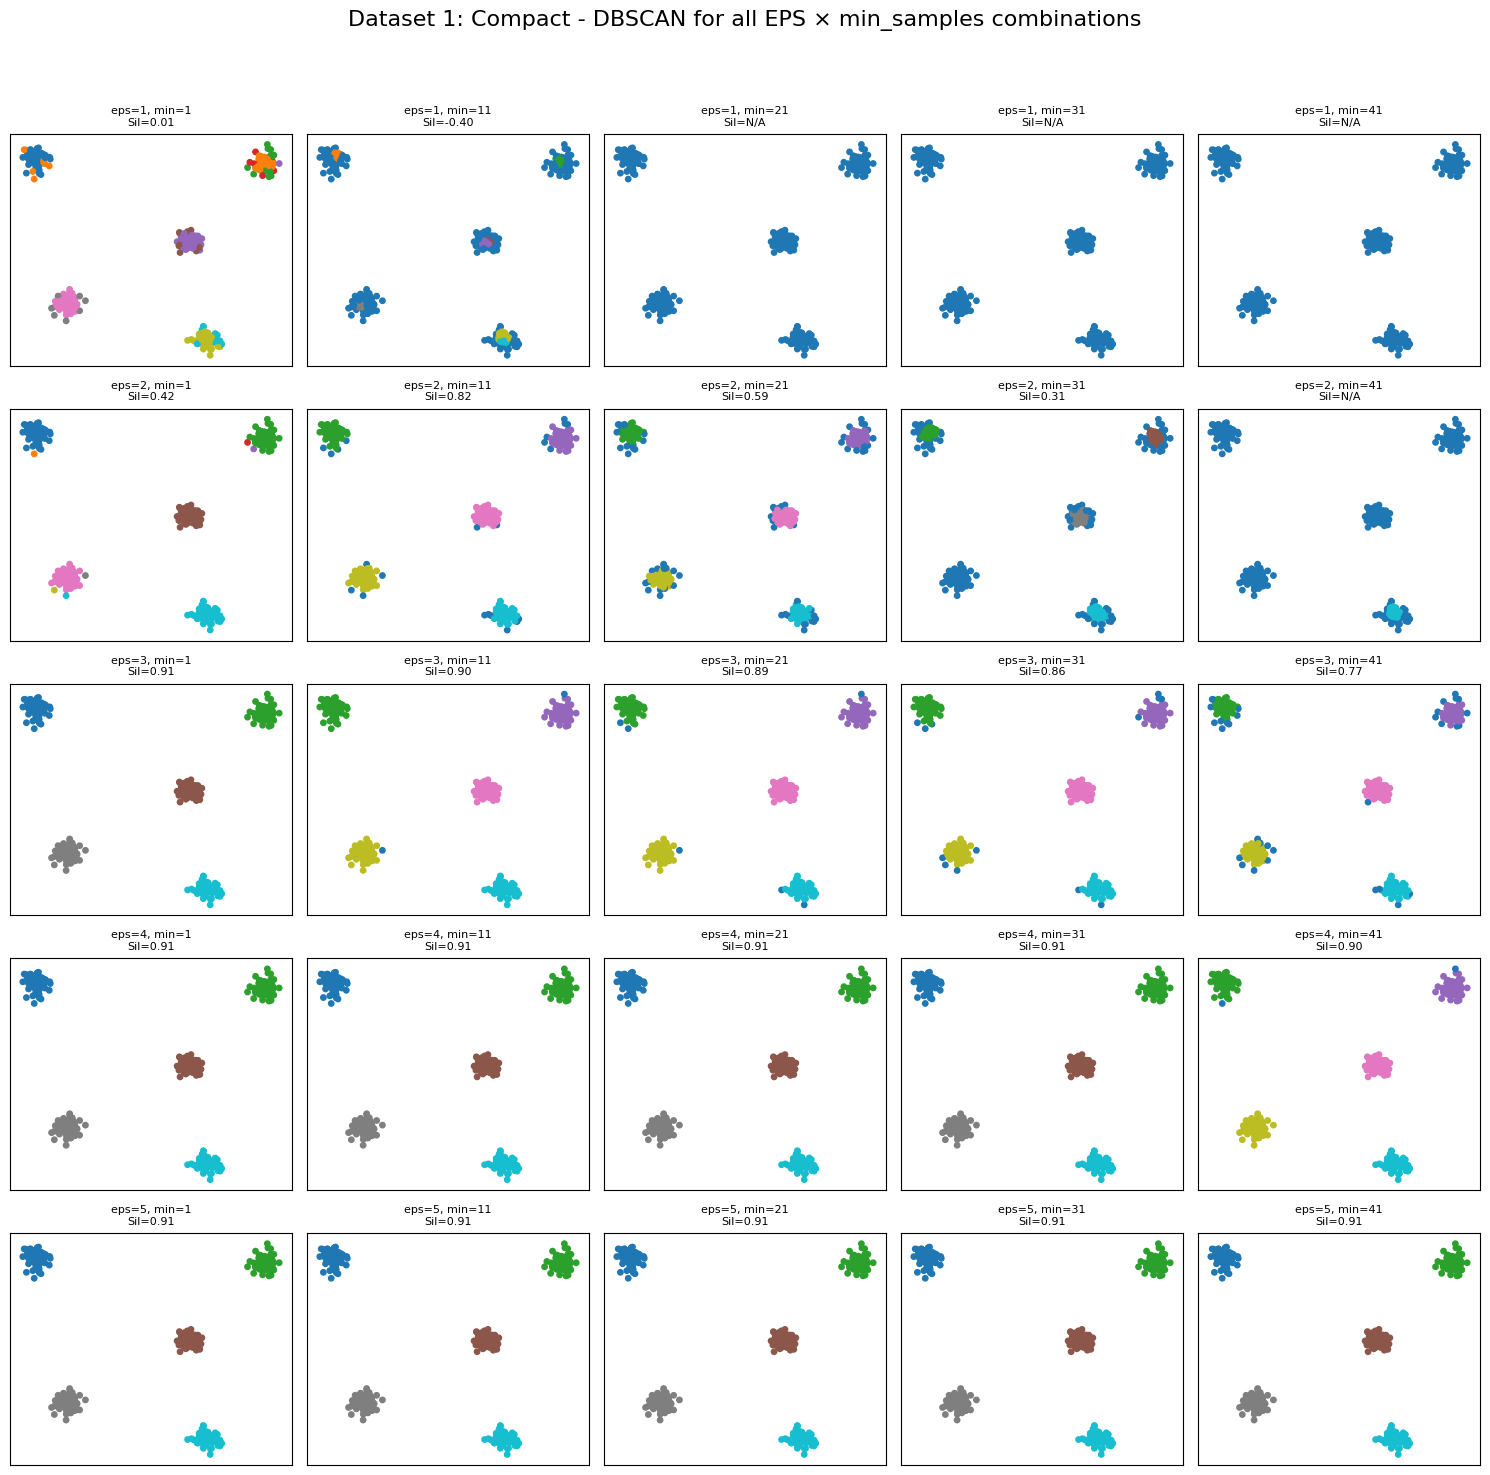

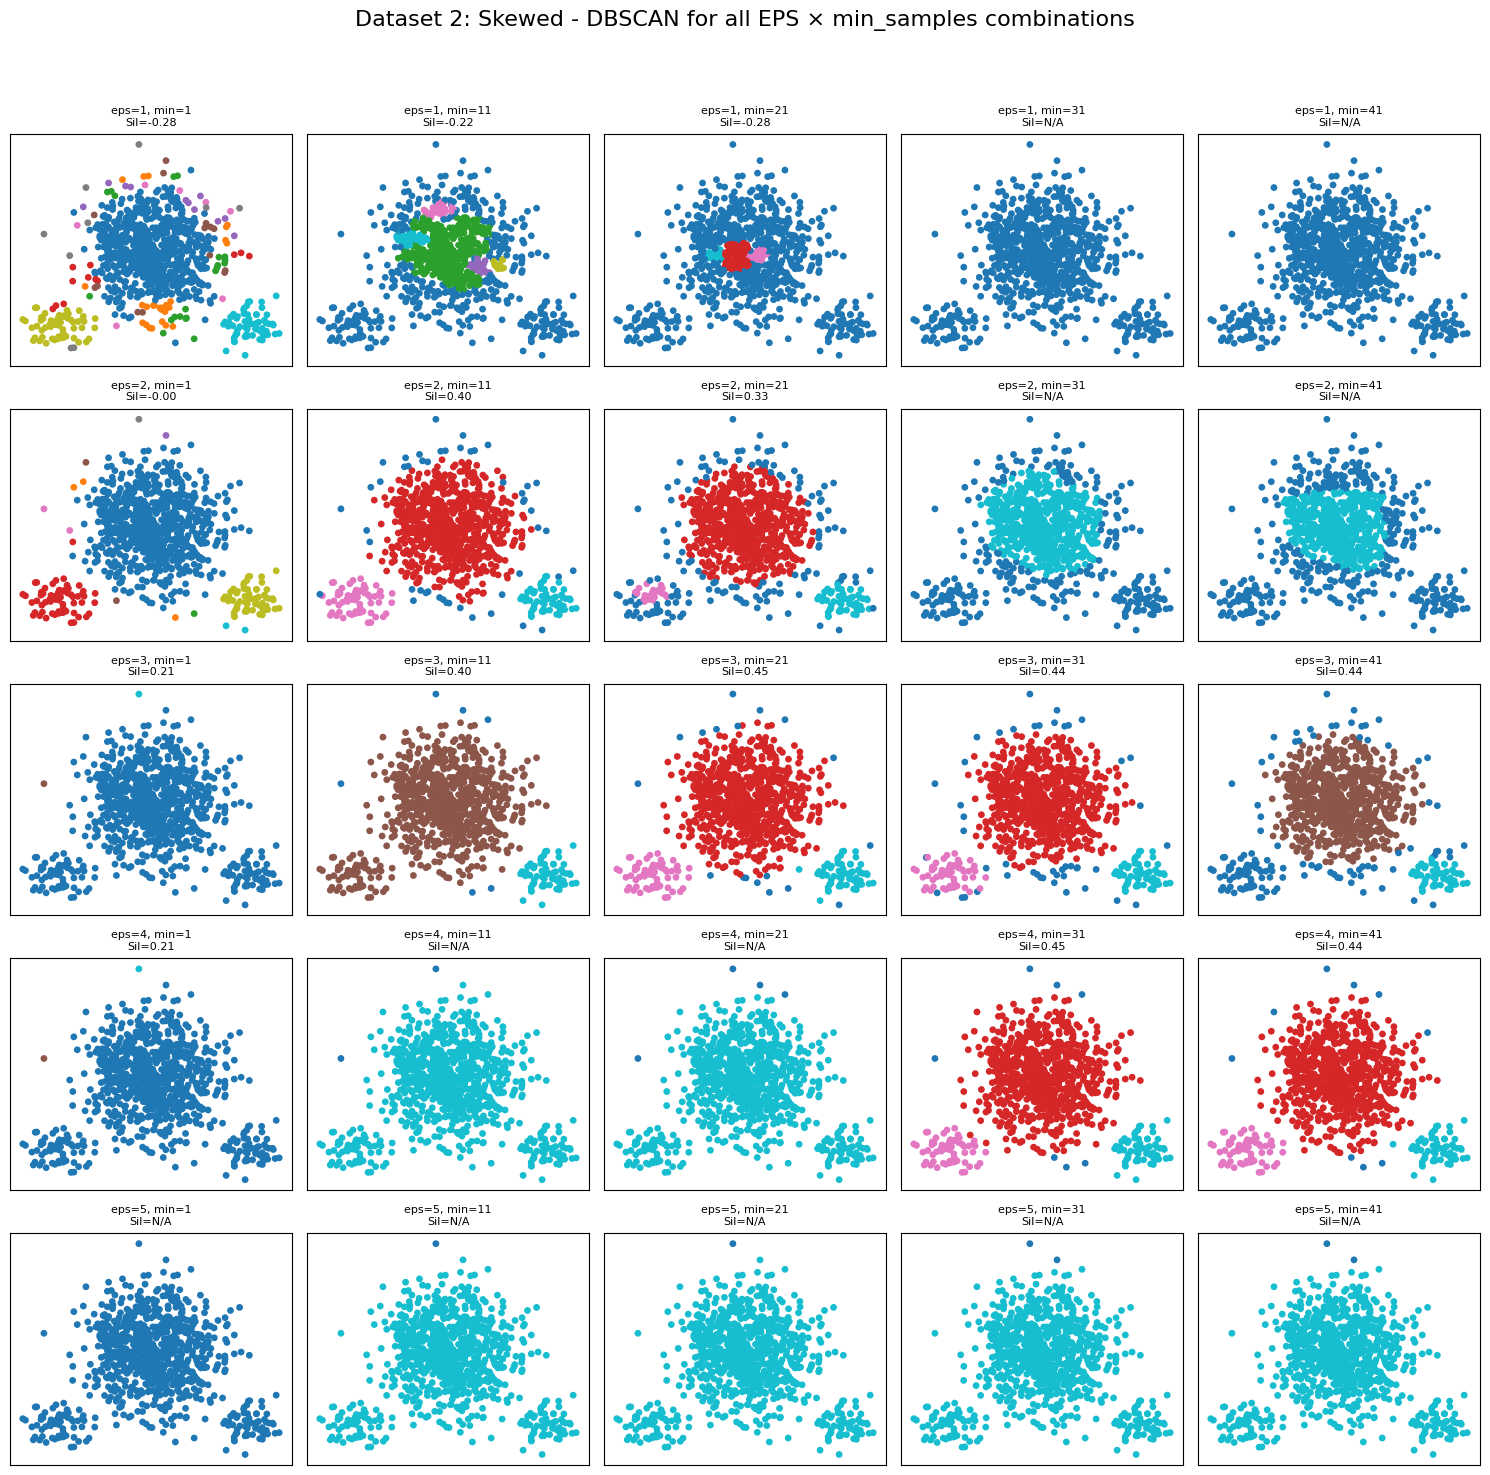

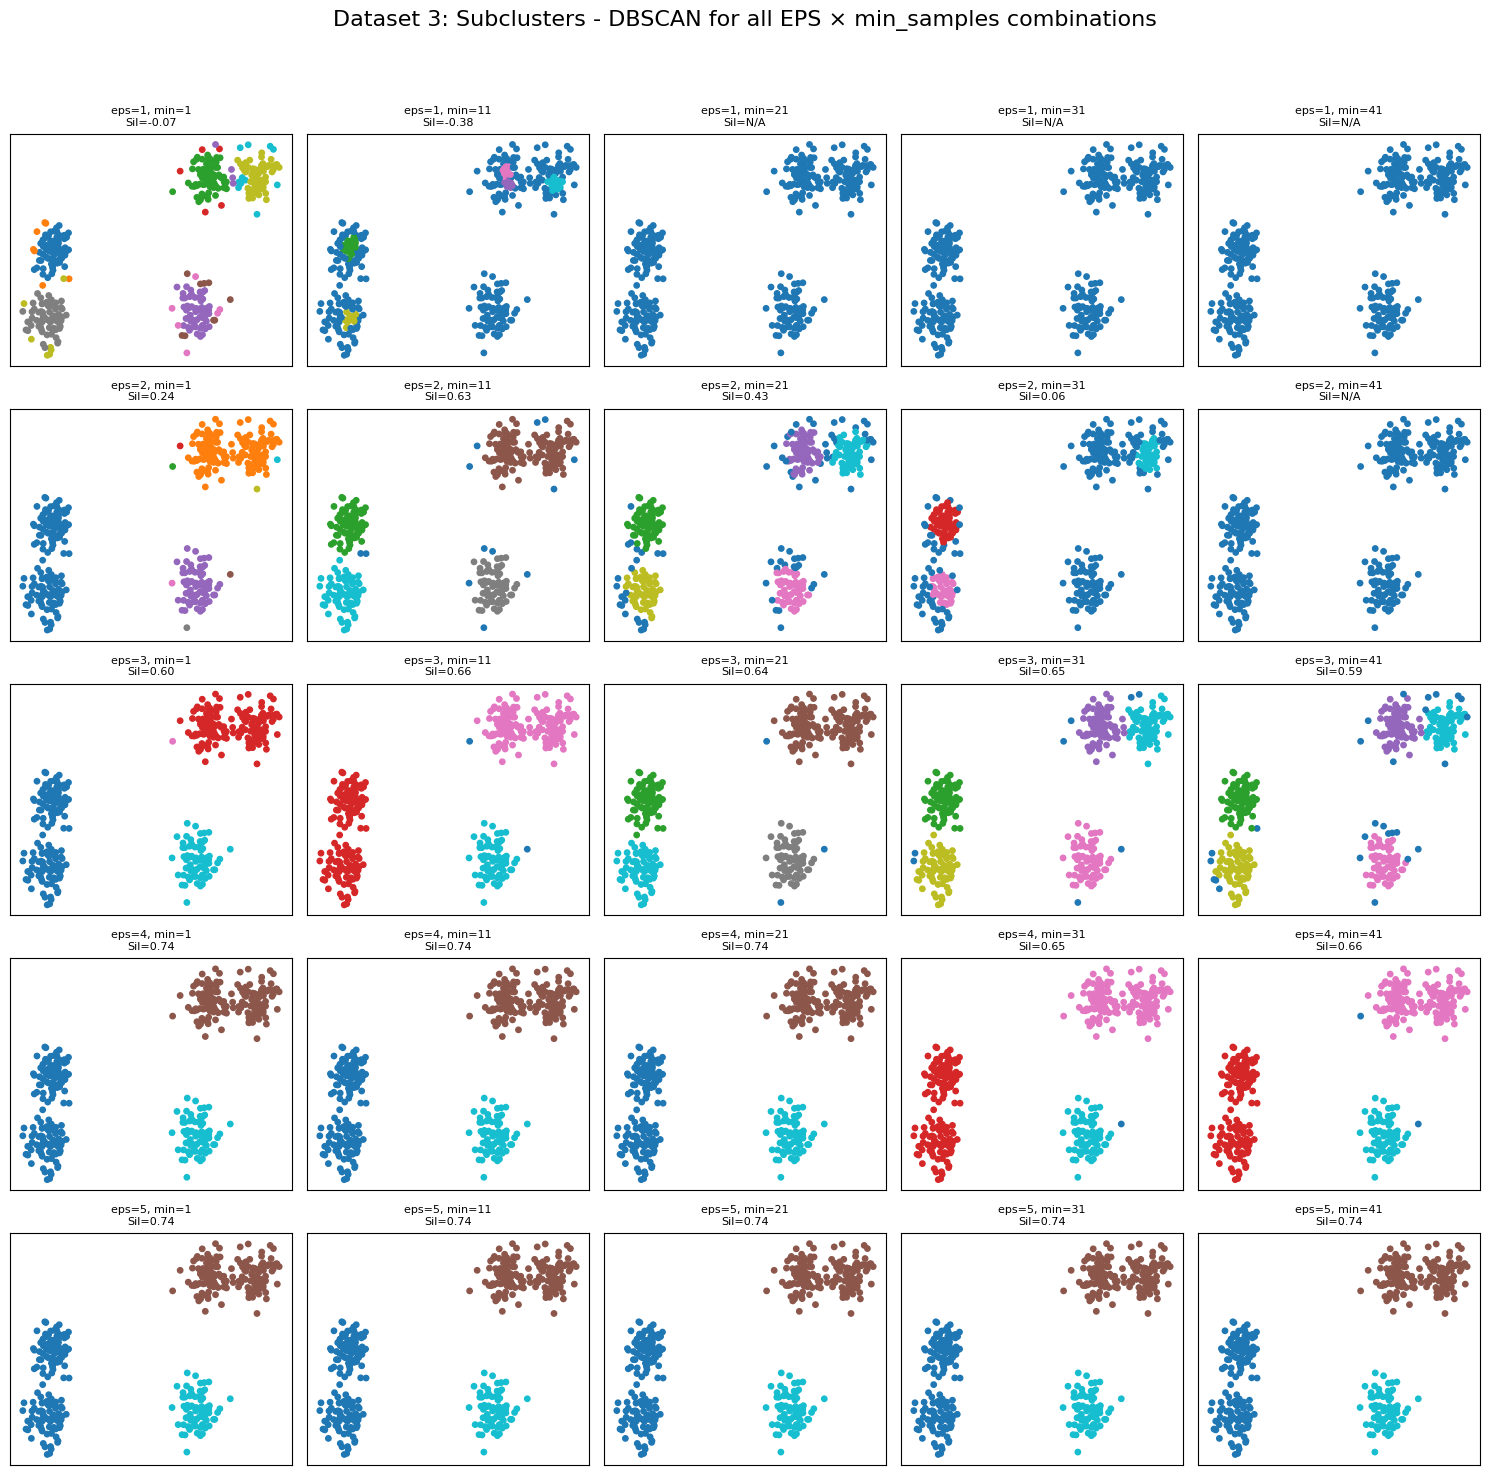

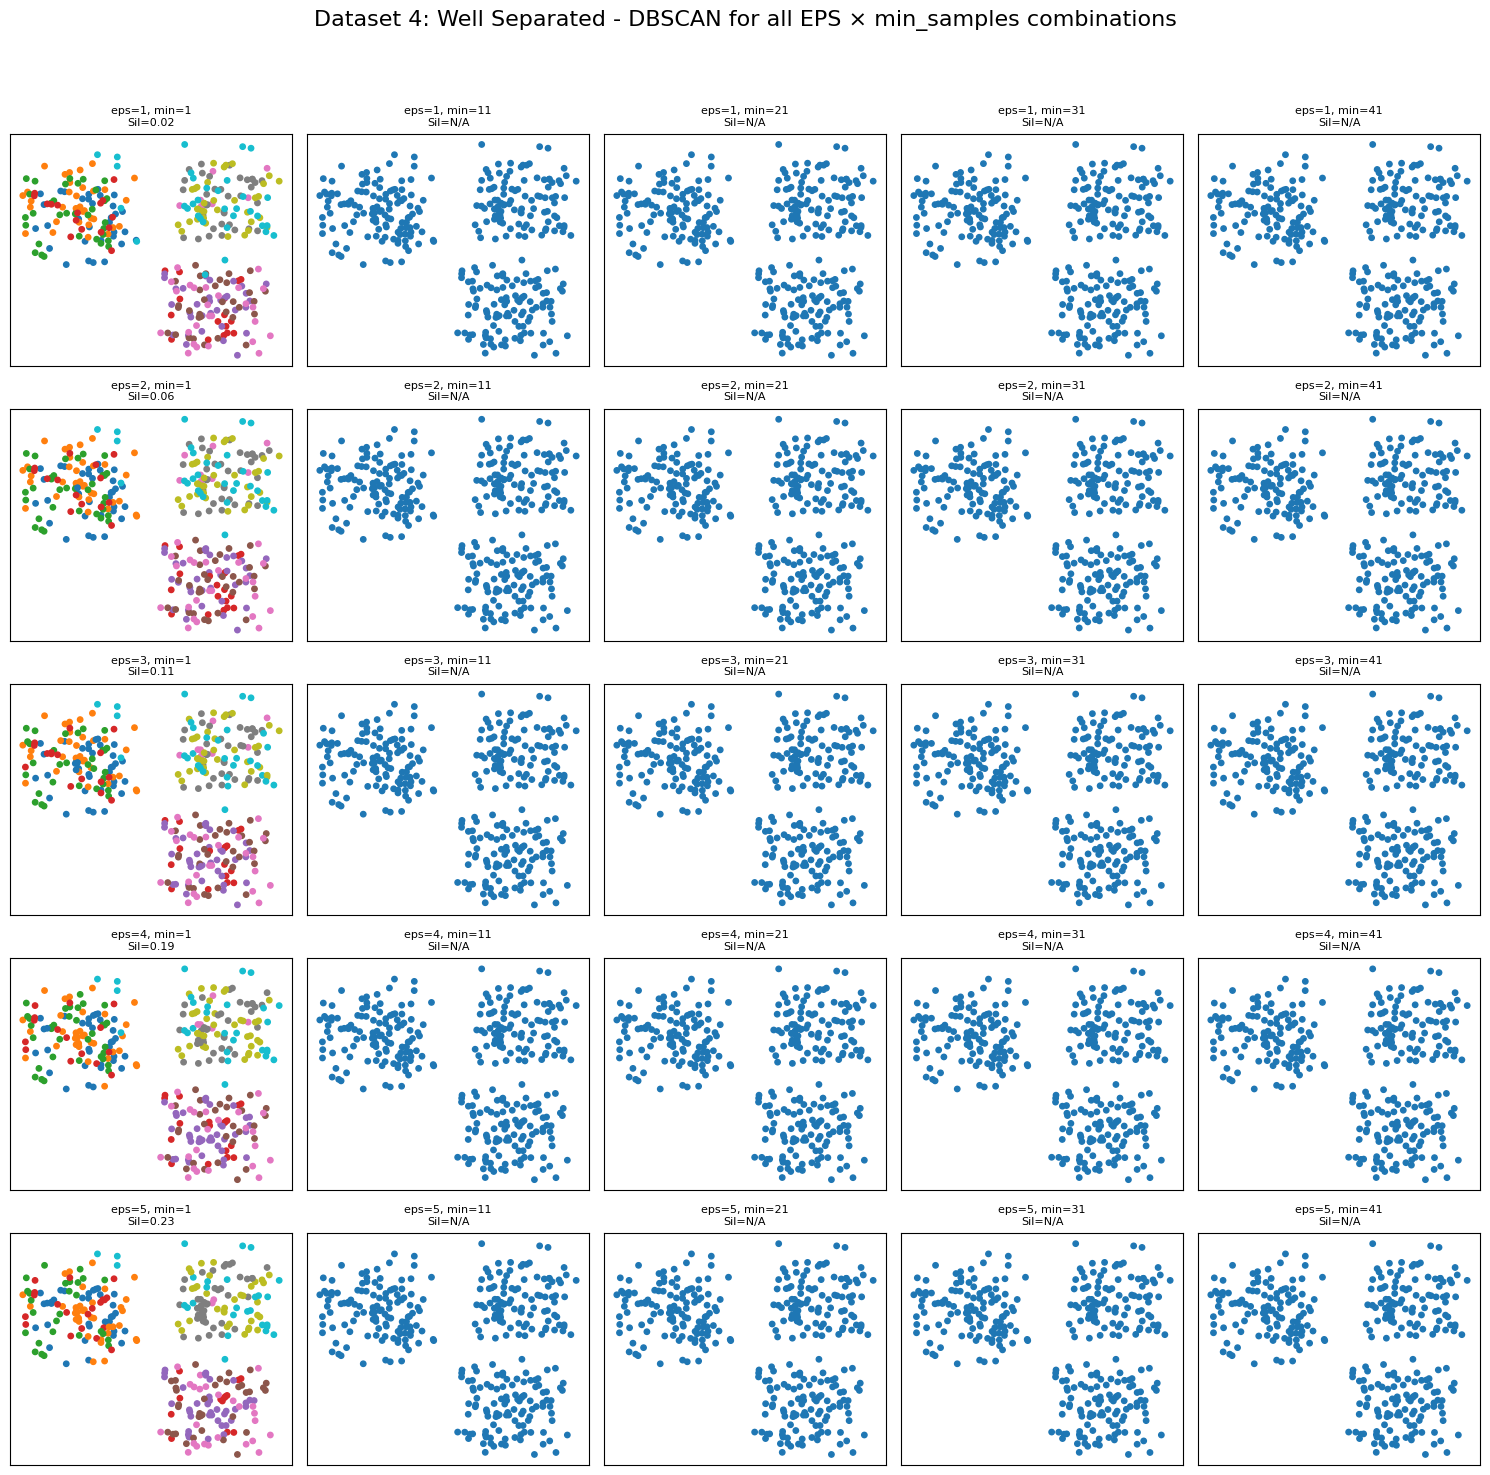

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

eps_values = np.arange(1, 6, 1)          # eps: 1,2,3,4,5
min_samples_values = range(1, 51, 10)    # min_samples: 1,11,21,31,41,51

for name, filepath in datasets.items():
    df = pd.read_csv(filepath)
    X = df.values
    
    n_eps = len(eps_values)
    n_min = len(min_samples_values)
    
    plt.figure(figsize=(3*n_min, 3*n_eps))
    plt.suptitle(f"{name} - DBSCAN for all EPS × min_samples combinations", fontsize=16)
    
    plot_idx = 1
    for eps in eps_values:
        for min_samples in min_samples_values:
            db = DBSCAN(eps=eps, min_samples=min_samples)
            labels = db.fit_predict(X)
            
            # Compute silhouette score only if there are at least 2 clusters
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            if n_clusters > 1:
                sil_score = silhouette_score(X, labels)
                title_text = f"eps={eps}, min={min_samples}\nSil={sil_score:.2f}"
            else:
                title_text = f"eps={eps}, min={min_samples}\nSil=N/A"
            
            plt.subplot(n_eps, n_min, plot_idx)
            plt.scatter(X[:,0], X[:,1], c=labels, cmap='tab10', s=15)
            plt.title(title_text, fontsize=8)
            plt.xticks([], [])
            plt.yticks([], [])
            plot_idx += 1
    
    plt.tight_layout(rect=[0,0,1,0.95])
    plt.show()


In [ ]:
# --------------------------------------------
# NEW CODE TO COUNT NOISE POINTS FOR EACH DBSCAN
# --------------------------------------------

noise_summary = []

for name, filepath in datasets.items():
    df = pd.read_csv(filepath)
    X = df.values

    for eps in eps_values:
        for min_samples in min_samples_values:

            db = DBSCAN(eps=eps, min_samples=min_samples)
            labels = db.fit_predict(X)

            noise_count = np.sum(labels == -1)
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

            noise_summary.append({
                "Dataset": name,
                "eps": eps,
                "min_samples": min_samples,
                "Noise Points": noise_count,
                "Clusters": n_clusters
            })

# Convert to DataFrame
noise_df = pd.DataFrame(noise_summary)

print("\n\n===== NOISE POINTS FOR EACH DBSCAN RUN =====\n")
print(noise_df)

# Optional: Save to CSV
noise_df.to_csv("dbscan_noise_counts.csv", index=False)
print("\nSaved noise count table to 'dbscan_noise_counts.csv'.")


NameError: name 'datasets' is not defined

AttributeError: partially initialized module 'pandas' has no attribute 'core' (most likely due to a circular import)